# Hands-on Activity 9.2 Customized Visualizations using Seaborn

---

**Name**: Cuadra, Audrick Zander G.

**Section**: CPE22S3

**Date**: April 2, 2024

**Submitted to**: Engr. Roman Richard

---

## Instructions:

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section

## Resources:

- Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csv

## Procedures:

- 9.4 Introduction to Seaborn
- 9.5 Formatting Plots

## Data Analysis:

The procedurees introduces Seaborn and demonstrates various plotting functions like strip plots, swarm plots, heatmaps, pair plots, joint plots, regression plots, and distribution plots using different plot types. It also covers formatting options such as titles, axis labels, legends, axis limits, tick labels, and tick formatting using Seaborn and Matplotlib. The procedures also focuses on formatting plots using Matplotlib, including setting titles, axis labels, legends, axis limits, tick labels, tick formatting, and using different formatters like PercentFormatter and MultipleLocator. Both notebooks provide comprehensive examples and explanations for data visualization and plot formatting techniques using Python libraries like Seaborn and Matplotlib.

## Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [2]:
%matplotlib inline
import matplotlib.pyplot as mpl
import numpy as ny
import seaborn as sbn
import pandas as p

fb = p.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = p.read_csv('/content/earthquakes-1.csv')

In [81]:
quakes_mb = quakes.query('magType == "mb"')[['mag', 'tsunami']]
quakes_mb.head()

,mag,tsunami
9,4.7,0
13,4.5,0
55,4.6,0
67,4.6,0
91,4.7,0


<Axes: >

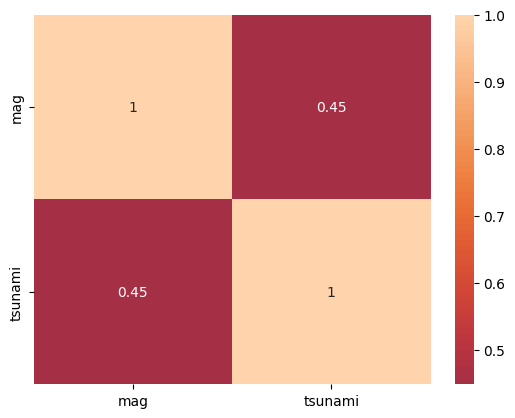

In [82]:
sbn.heatmap(
    quakes_mb.corr(), annot=True, center=0
)

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [8]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [29]:
Q1_volume = fb['volume'].quantile(0.25)
Q3_volume = fb['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
bound1_volume = Q1_volume - 1.5 * IQR_volume
bound2_volume = Q3_volume + 1.5 * IQR_volume

Q1_close = fb['close'].quantile(0.25)
Q3_close = fb['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close
bound1_close = Q1_close - 1.5 * IQR_close
bound2_close = Q3_close + 1.5 * IQR_close

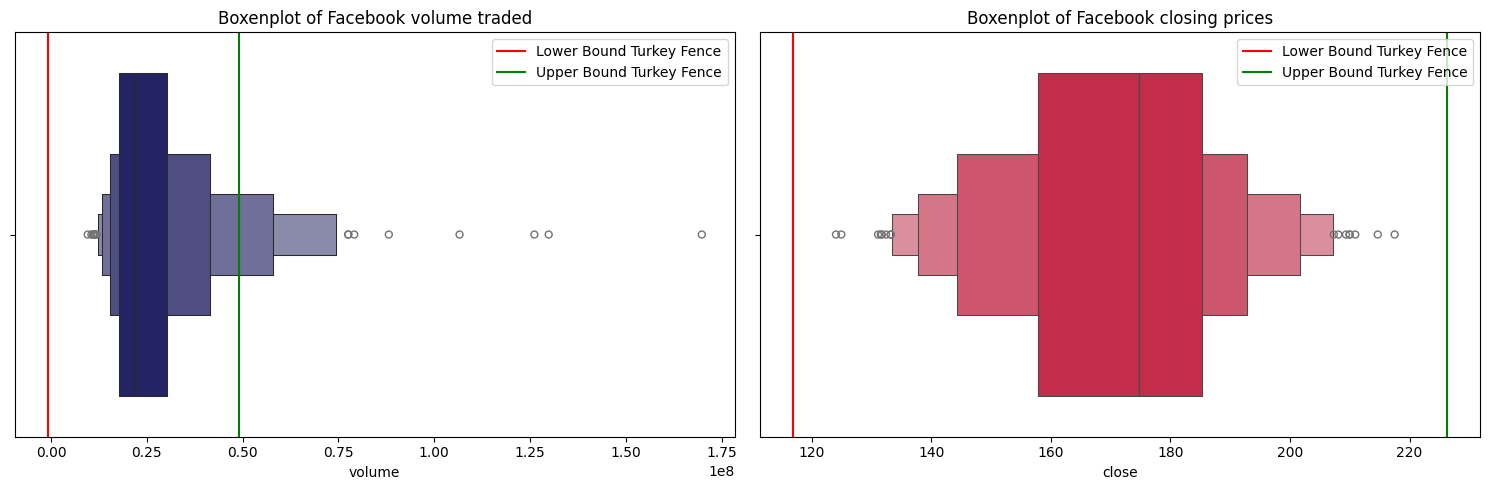

In [33]:
fix, axes = mpl.subplots(ncols = 2, figsize = (15,5))

sbn.boxenplot(x='volume',
              data=fb,
              ax=axes[0],
              color='midnightblue')
axes[0].axvline(x=bound1_volume, color='red', linestyle='-', label='Lower Bound Turkey Fence')
axes[0].axvline(x=bound2_volume, color='green', linestyle='-', label='Upper Bound Turkey Fence')
axes[0].set_title('Boxenplot of Facebook volume traded')

sbn.boxenplot(x='close',
              data=fb,
              ax=axes[1],
              color='crimson')
axes[1].axvline(x=bound1_close, color='red', linestyle='-', label='Lower Bound Turkey Fence')
axes[1].axvline(x=bound2_close, color='green', linestyle='-', label='Upper Bound Turkey Fence')
axes[1].set_title('Boxenplot of Facebook closing prices')

axes[0].legend()
axes[1].legend()
mpl.tight_layout()
mpl.show()

3. Fill in the area between the bounds in the plot from exercise #2.

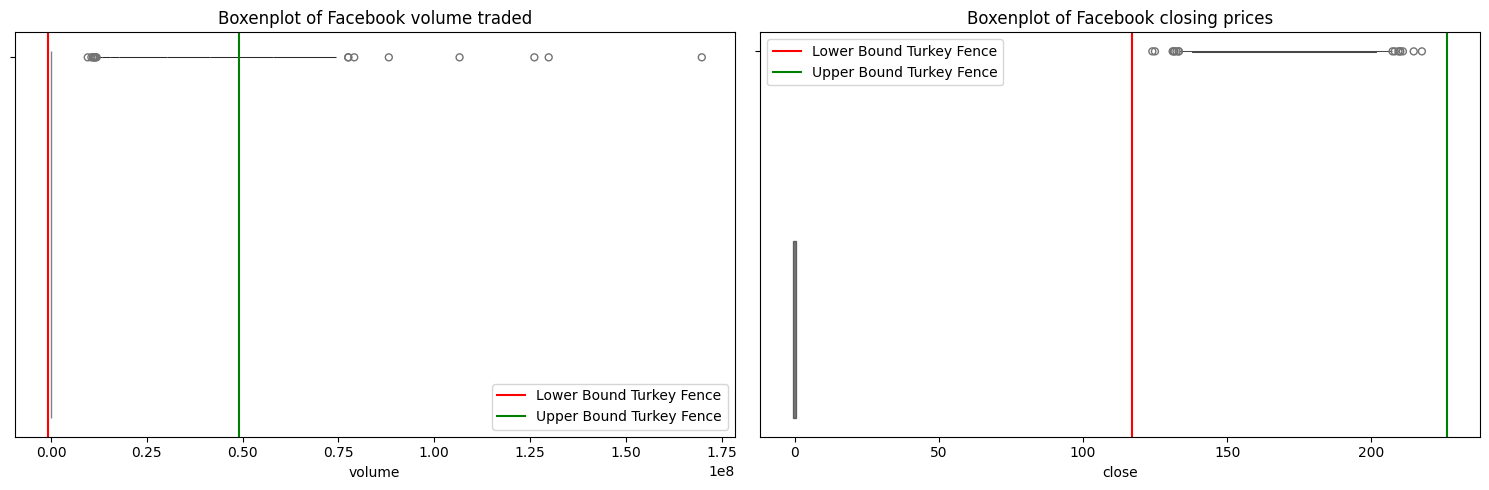

In [42]:
fix, axes = mpl.subplots(ncols = 2, figsize = (15,5))

sbn.boxenplot(x='volume',
              data=fb,
              ax=axes[0],
              color='midnightblue')
axes[0].axvline(x=bound1_volume, color='red', linestyle='-', label='Lower Bound Turkey Fence')
axes[0].axvline(x=bound2_volume, color='green', linestyle='-', label='Upper Bound Turkey Fence')
axes[0].fill_betweenx([bound1_volume, bound2_volume], axes[0].get_ylim()[0],
                      axes[0].get_ylim()[1], alpha=0.5, color='black')
axes[0].set_title('Boxenplot of Facebook volume traded')

sbn.boxenplot(x='close',
              data=fb,
              ax=axes[1],
              color='crimson')
axes[1].axvline(x=bound1_close, color='red', linestyle='-', label='Lower Bound Turkey Fence')
axes[1].axvline(x=bound2_close, color='green', linestyle='-', label='Upper Bound Turkey Fence')
axes[1].fill_betweenx([bound1_close, bound2_close], axes[1].get_ylim()[0],
                      axes[1].get_ylim()[1], alpha=0.5, color='black')
axes[1].set_title('Boxenplot of Facebook closing prices')

axes[0].legend()
axes[1].legend()
mpl.tight_layout()
mpl.show()

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

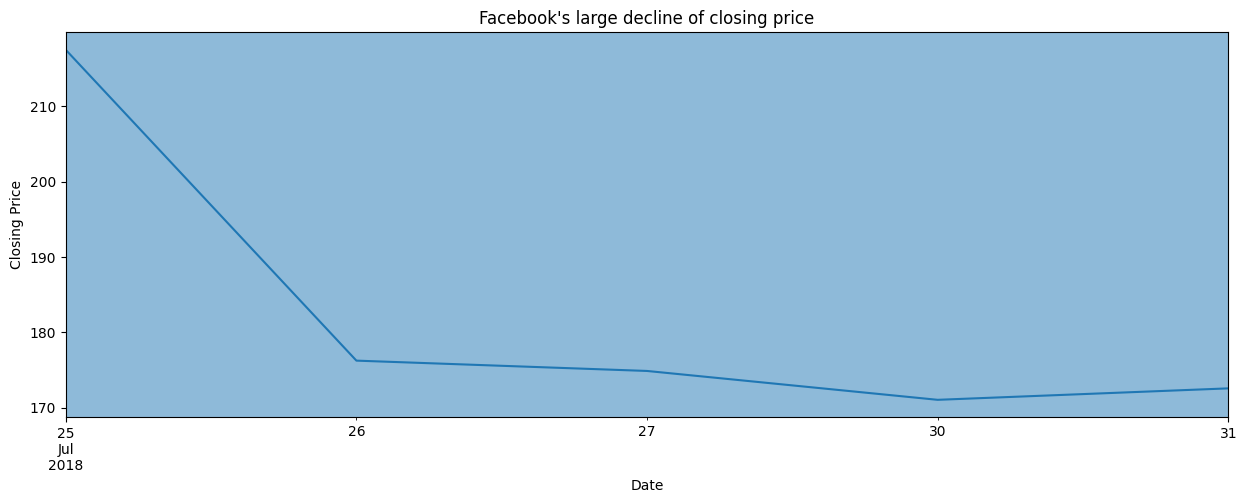

In [71]:
fb = p.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

fb_specified_dates = fb[(fb.index >= '2018-07-25') & (fb.index <= '2018-07-31')]
fb_plot = fb_specified_dates['close'].plot(
    label='Closing Price', figsize=(15,5),
    title='Facebook\'s large decline of closing price'
)

fb_plot.axvspan('2018-07-25', '2018-07-31', alpha=0.5)
mpl.xlabel('Date')
mpl.ylabel('Closing Price')
mpl.show()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

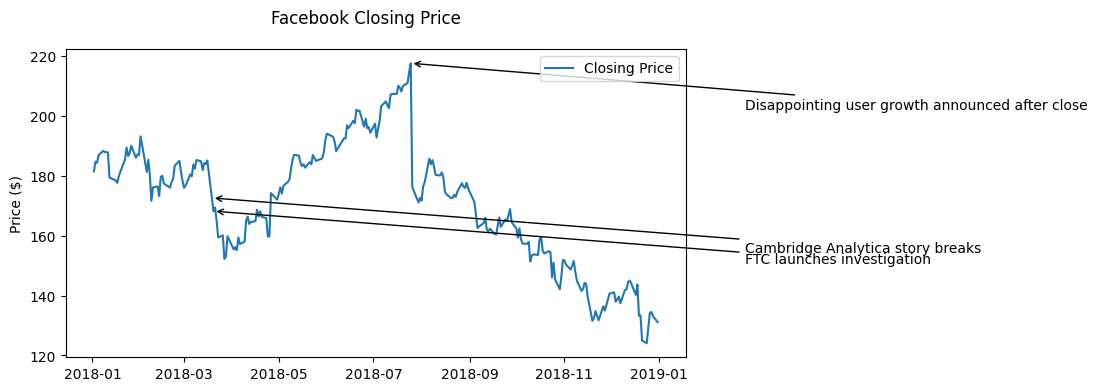

In [91]:
fb = p.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
fb_close = fb['close']
events = [
    ('Disappointing user growth announced after close', p.to_datetime('2018-07-25')),
    ('Cambridge Analytica story breaks', p.to_datetime('2018-03-19')),
    ('FTC launches investigation', p.to_datetime('2018-03-20'))
]

mpl.figure(figsize=(8, 4))
mpl.plot(fb_close.index, fb_close.values, label='Closing Price')

for event, date in events:
    y_value = fb_close.loc[date]
    jitter = ny.random.uniform(-20, -10)
    mpl.annotate(
        event,
        xy=(date, y_value),
        xytext=(p.Timestamp('2019-02-25'), y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )

mpl.ylabel('Price ($)')
mpl.suptitle('Facebook Closing Price')
mpl.legend()
mpl.show()

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

<ipython-input-94-c908cf60fb53>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', num_cols)


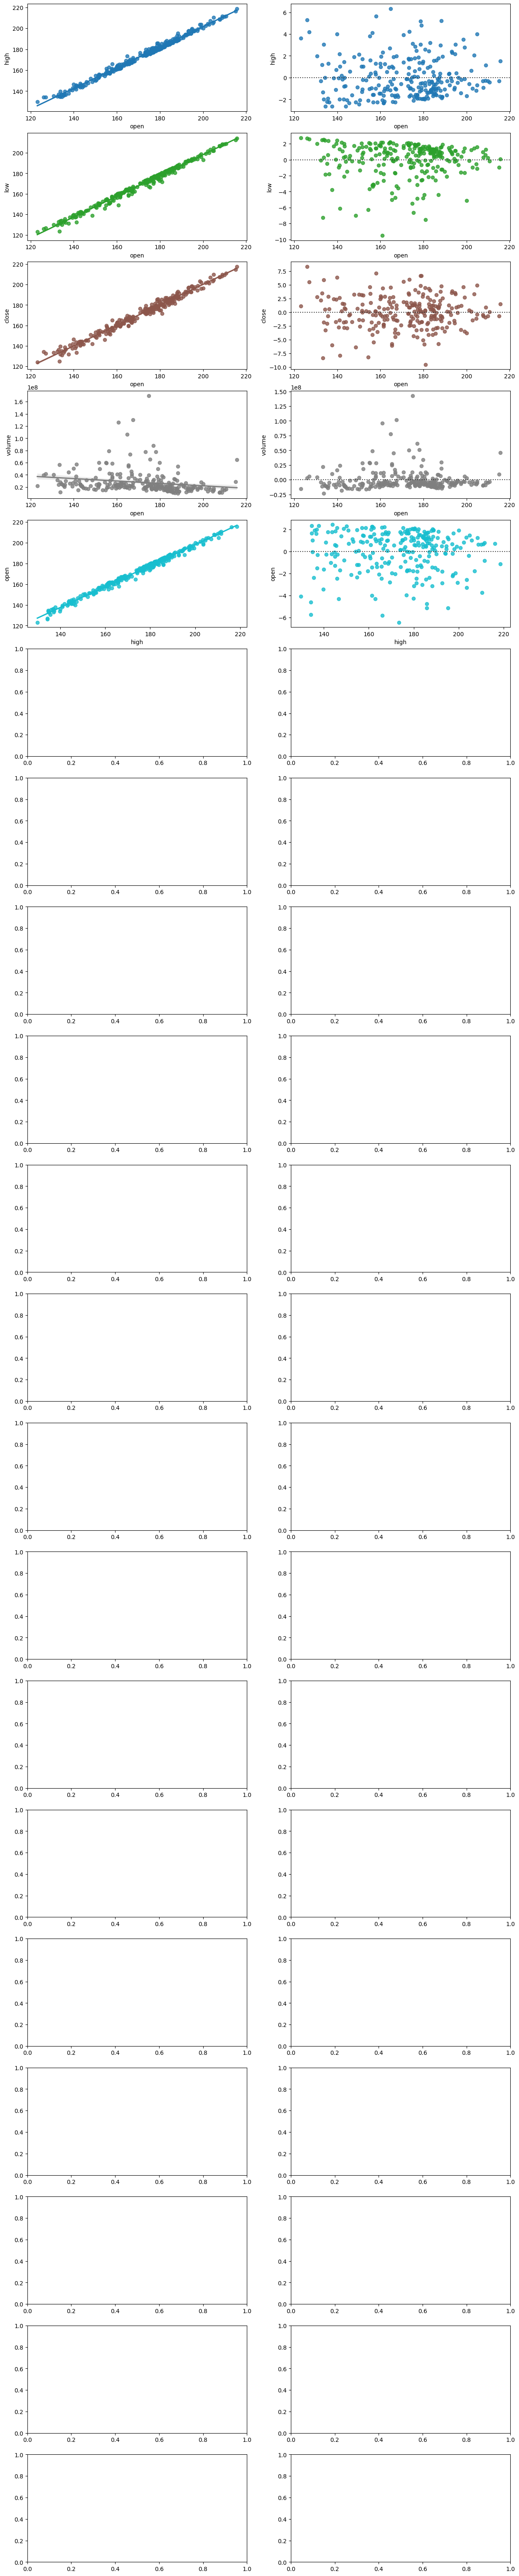

In [94]:
import itertools
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.
    Parameters:
    - data: A pandas DataFrame
    Returns:
    A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    fig, ax = mpl.subplots(
        permutation_count,
        2,
        figsize=(15, 4 * permutation_count)
    )
    colormap = cm.get_cmap('tab10', num_cols)

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        [colormap(i) for i in range(num_cols)]
    ):
        for subplot, func in zip(axes, (sbn.regplot, sbn.residplot)):
            func(
                x=x,
                y=y,
                data=data,
                ax=subplot,
                color=color
            )
    mpl.close()
    return fig

reg_resid_plots(fb)

## Summary/Conclusion:

- The HoA challenges us to perform data analysis and visualization using Seaborn and Matplotlib libraries. Various visualization techniques are demonstrated, such as correlation heatmaps, box plots with Tukey fences, and annotating events on line plots. The HoA also challenges us with tasks utilizing advanced techniques like colormap customization and shading rectangles to highlight specific periods in the data. Overall, the HoA serves as as an activity that allows us to experiment with Seaborn and Matplotlib for data visualization.